In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import datetime as dt
from enum import Enum

import sys
sys.path.append('../../')
sys.path.append('../../models')

In [2]:
#python stores a file containing Kp, Ki and a time series of market prices 
#(an array of tuples, or two arrays, containing a timestamp and the price, 
#or the time elapsed and the price change - we can go with whatever is easier to implement on the JS side)

#instead of file name being hardcoded, we could have it stored in an environment 
#variable that both python and JS read from
Kp = -.25/3600/96
Ki = 0
t = 652
delta_t = [3600] * t
market_prices = [
2.03520968321892,
2.00675297061406,
2.02594470965992,
2.05147525236802,
1.94445601467646,
2.02239911780698,
1.97545540121308,
2.04701830437048,
2.03710453441238,
2.03109540807974,
2.06449950843314,
2.04745640130152,
1.95964154660084,
2.01367518517488,
2.03242966121074,
2.05854634236932,
2.03752413443908,
2.0397415324447,
2.06398377159906,
2.06501549672564,
2.0863899293597,
2.0956315131753,
2.02108086528232,
2.04823126727166,
2.02879858588588,
1.99730732850605,
2.0214424057727,
2.0113906905597,
2.0063062015572,
1.97821544717622,
1.97540448951981,
1.99755020218899,
1.99260109456984,
2.0268415299332,
2.01580575840136,
2.00986512603544,
1.9931015258345,
2.06179522357066,
2.02736115605784,
2.00544099528424,
2.0221845593163,
2.08115817038978,
2.044059998656,
2.03227625144928,
2.01986512561772,
2.02705959195,
2.02216058788016,
1.98600222391581,
2.00696538180202,
2.05627055206304,
2.0508737095674,
1.98817274797866,
2.02375316455944,
2.00346259487718,
2.01027615473544,
2.01960947479206,
2.00591215933736,
2.00585901688712,
2.00829183062444,
2.01511788097462,
2.0127034000342,
2.01695185471752,
2.00814196864076,
2.02033201253266,
2.0158580438663,
2.01367333910468,
2.03190230146978,
2.03028934322612,
2.00972569166168,
2.02049225678708,
2.01801070759474,
2.00985581972986,
2.00207097904272,
2.0157000521912,
2.00315435311198,
1.99598038731564,
2.0022824097008,
1.9990151145641,
2.01441682687048,
2.0362358339273,
2.00899656124322,
2.0068795680468,
2.00383861122696,
2.00469864330778,
2.0247640952968,
2.00058801062598,
1.98005853485777,
2.00902458297792,
1.99595418875121,
1.99628268169827,
2.03337357272778,
2.01278267461626,
2.00485249746846,
1.99184957293261,
2.01691605404554,
2.00428681971892,
1.99544700910933,
1.99426318637314,
1.99061839140484,
2.01273958497158,
2.01004473638862,
2.02713087643778,
2.01901585632072,
1.98864761933261,
1.99294450025553,
1.99836820293326,
1.98602453474861,
1.97923251575891,
2.00577680392608,
1.99954866557716,
1.99936426342186,
1.97299785712999,
2.00949014178768,
1.97713735113012,
1.98144389306715,
2.00893887656812,
1.99486446995536,
1.98878017172746,
2.00053532624584,
1.99653412519239,
1.98488490599702,
1.98392584497559,
1.99753949036457,
2.00576203288062,
2.01168201361362,
2.00048485013546,
2.0055451797667,
2.00199996397156,
2.01577274736752,
1.99673721701186,
2.00232956328982,
1.99528607664272,
2.02307492461018,
2.01648858883064,
2.0162507995976,
1.99541113118681,
2.00423174363252,
1.99283422843438,
2.0043963192483,
2.0198074679771,
2.00324851708924,
2.0077490218851,
2.00495708176672,
1.995910750431,
2.04471152887506,
2.00147670834054,
1.9938875448048,
2.0149946775615,
1.99498835016222,
2.00844417102934,
2.00481153256118,
2.00386631666708,
1.99667987891669,
2.00666354794718,
2.00609255162592,
2.0036796616688,
2.07821276297332,
2.07800292944372,
2.01473127703682,
2.00688262201492,
2.0043135509331,
2.04084136419488,
1.99672109758376,
1.9861606589584,
1.99612362909774,
2.01546868809066,
1.98221378972485,
1.97420890484707,
2.00018827143312,
2.00485176249052,
2.01365146751462,
1.99967249017769,
2.00213735008524,
1.88539252530351,
1.96001605836226,
1.99431898605143,
2.01891839347158,
2.00423843318992,
1.97505518678136,
1.99955507798393,
2.001222765983,
2.0044218611502,
2.0166753070486,
1.98300011762632,
1.97540045474697,
1.99273712985676,
1.99543732003085,
2.00809439169954,
1.985361924246,
1.98749130427326,
1.9981101719685,
1.98445536045132,
1.98794330358673,
1.98762498749353,
2.00720517319654,
1.97770730438776,
1.978224993019,
1.95497610511525,
1.97858555208502,
1.99383522285742,
1.99093214759386,
1.98218466609698,
2.00143045175536,
2.0078361558574,
1.99640286335841,
1.96007654566882,
1.9901772327081,
1.97312000882625,
1.98075304898774,
1.98882619641213,
1.97665450678665,
1.97430479583348,
1.9715962725127,
1.99305275874411,
2.0020957486458,
1.98443989903389,
1.98579167463427,
2.00261352431884,
1.98202436089842,
1.96927949921446,
1.99029581859932,
1.9895756803771,
1.97605398157548,
1.99195168838284,
1.98982387558279,
1.98685528522669,
1.98852469339837,
1.99619395761265,
2.0236831776301,
1.97235045936336,
1.99072904553552,
1.99282064608879,
1.98699897495635,
2.00947323133084,
1.98997789435184,
2.02019108817518,
2.02805696913478,
2.0181094850195,
2.06014762375034,
2.04537722039926,
2.01087623993504,
2.0109482425464,
2.00330628016574,
2.00804720079636,
2.00546492260926,
2.02224376920706,
2.03489389235354,
2.02356485396662,
2.0048537969566,
2.00809065911456,
2.0001162763745,
2.01341278682366,
1.99478877796307,
1.97616408145392,
1.9986813804789,
2.01840815438634,
2.0057284888919,
1.99281577846872,
1.99339988691729,
2.00556442720126,
2.0040051177108,
2.05627080978888,
2.06041190116682,
2.02524135496476,
2.0304232387183,
2.0283884810638,
2.0078156466774,
2.0167626175017,
2.01995239864638,
1.98252493718612,
1.99261124464541,
1.99090803770339,
1.99564107444142,
2.00208119574052,
1.99893117872897,
2.00143330446384,
1.99612823510074,
1.97929337011773,
1.97915935944557,
2.00003881708042,
1.99516989483361,
1.99421578567539,
1.99379581347623,
1.99204404928256,
2.0019681339666,
2.00096495048134,
1.99366038766118,
1.99449043288677,
1.9943866224103,
1.99956752171734,
1.99509799830292,
1.99480785420944,
2.00090551646518,
2.00052920604946,
1.99275506373209,
2.00043075942544,
2.0019870816743,
2.02771550114042,
1.99486264870874,
2.00367256712248,
2.02258139199692,
2.04711848537468,
2.03637059531724,
2.02184169073644,
2.00123271285092,
2.00751143305456,
1.97874887525652,
2.00078418824602,
1.99288761770608,
1.98822539929218,
1.97101338700082,
1.99457855800469,
1.99430274518834,
2.00897613068114,
2.0002779514101,
1.99574072011329,
1.9897628629339,
1.99425285277339,
2.00016330271978,
1.97004110288853,
1.98265320994821,
1.965423449018,
1.97911883228167,
1.96034717946417,
1.97629447338553,
1.98858752899016,
2.0010975681561,
1.99439733168549,
2.01153430293738,
1.98731518187713,
2.0012351103995,
2.03140458431826,
1.96859405233277,
1.9758162505733,
1.99761652768986,
1.98485043489336,
2.02656049871014,
2.0376973977385,
1.99724961982213,
2.00453264783292,
2.02675068465164,
2.03775050651516,
2.05970388566316,
1.98079219658166,
2.01500789923936,
1.97407719525971,
1.98194162879499,
1.99826240602081,
2.00763378056254,
1.98447103736302,
2.00820027124652,
1.98922590001684,
2.01496362688466,
2.05377879562146,
2.05674927361562,
2.03972989086342,
2.03978457604494,
2.05571583545738,
2.05147962254366,
2.05717654679138,
2.08564215069194,
2.06768923573844,
2.05562851460848,
2.0613337796875,
2.03734431136728,
2.01588755370074,
2.03093781861478,
2.01821769796876,
2.03744073284738,
1.99947711783177,
1.96161037176939,
1.98778913778557,
2.00873898718408,
1.99228950130262,
2.02332113611652,
2.01487899853484,
2.01791609825436,
2.00870296434284,
1.98917933520774,
2.02596200190614,
1.99889860265247,
2.02601129306152,
2.01095192462894,
1.98894579908192,
2.00029730005964,
2.00238973395854,
1.99778119760001,
1.96882379697161,
2.0201061536681,
2.01830687060912,
2.01151457633474,
2.0227842212951,
1.96870822836893,
1.99457222106046,
2.0070708405178,
1.96998748182491,
1.99335910885329,
1.96536085967205,
1.98763725336527,
1.98488364137446,
2.00650654771912,
1.98149467560093,
2.01306602819684,
2.00617790537672,
1.99099908300737,
2.00404716391402,
2.0270123539177,
2.03092507825886,
1.99999705356819,
2.01229661013196,
1.99494801229107,
1.99353182271397,
1.9942500601633,
1.98731002772337,
1.99302134731227,
1.98908804398501,
1.99060017037534,
1.98433624164846,
1.99410262403202,
1.98956352716089,
1.97279180871515,
1.97478097520087,
1.98296732661824,
1.99547159746699,
1.98022238962454,
1.99053947992496,
1.9728064447244,
1.97506706312052,
1.98691255804922,
1.98729869728457,
2.02188034886702,
1.98746234810569,
1.99990219577046,
1.98226500400151,
1.98427893522761,
2.0008069540092,
2.02794900297052,
1.99113919512892,
1.96345593587175,
1.95808616033789,
1.98412550213722,
1.95333122256889,
1.9569177058999,
1.95642218905726,
1.95058014349223,
1.93457776622349,
1.96794789098353,
1.97711241361417,
2.00087228811414,
2.00839640605364,
2.00427734535296,
1.99891428408191,
1.98500225774139,
1.99053177359602,
1.97196799310205,
1.96250048782417,
1.96373957222539,
1.95574893953798,
1.95540702434622,
1.96871275840697,
1.96878119676459,
1.99011524385344,
1.99201066707332,
1.98262802293243,
1.98233404815461,
1.97546447689276,
1.93043398361761,
1.91680083006993,
1.92908725982356,
1.9289290352164,
1.94848681717834,
1.94867880113568,
1.94600627737034,
1.92752359112789,
1.93795509474365,
1.92255047164483,
1.91334268712223,
1.90240756991453,
1.91719686637114,
1.92100366724727,
1.90378519367133,
1.92610248456784,
1.95063197108939,
1.95373725577032,
1.96046054318446,
1.94669223844992,
1.93995771185916,
1.94292963884402,
1.94328923816847,
1.94489218271441,
1.94896894454141,
1.94711251592819,
1.94532504293974,
1.98748536112476,
1.99028867769422,
1.98875718945278,
1.99444214084664,
2.00820457315574,
1.98635203902371,
1.98097469195323,
1.99245269576816,
1.98759695619371,
1.99601927789092,
1.99410737376046,
1.98852801281661,
1.9712921710888,
1.99174329156033,
1.98690490165143,
1.98392807522475,
1.97552382899906,
1.96780644533076,
1.98102479396077,
1.99607270726888,
2.01497292087072,
2.04508706291824,
2.03287824587024,
2.00450730504584,
1.99504055269575,
1.9943329041668,
1.98956759186852,
2.00129620997312,
2.00291355120916,
1.97690201270979,
1.9924887931393,
1.99411312659103,
2.0087088566903,
2.02620235148166,
2.01574453992642,
2.01549656103788,
2.00103352195058,
1.99434051884611,
1.99826283986643,
2.01622714012926,
2.01729551709864,
2.00908548493742,
2.01362149656964,
1.99828668406717,
2.01675267222178,
2.01335471669012,
2.00279439230472,
1.99869099328311,
1.96996212889866,
1.98269349588095,
1.98962112951302,
2.02538036103034,
1.98731893487566,
1.98714367989947,
1.9941693251543,
1.99139526104679,
1.98012548167525,
2.0001151079022,
1.99437164093935,
1.98638924813181,
2.00342490304168,
2.0092958622805,
2.0239968290223,
2.02637060287236,
1.99158628322626,
1.99163087094196,
1.99043704045312,
1.97721709844511,
1.96960464577727,
1.97310888166594,
1.96996755992897,
1.9823567640539,
1.99415547972573,
1.97924937824334,
1.96464382695528,
1.99166280685974,
1.98743205669929,
1.97018327865925,
1.95851805233819,
1.98751660175499,
2.00041026241662,
1.97587979044355,
2.01162917466942,
1.96402544685928,
1.97292471773011,
1.98137006213198,
1.99424710086615,
2.0096298861944,
2.01045825366732,
2.00323910761124,
2.00109284707518,
2.01135746017056,
2.01318474958836,
2.01527714127628,
2.01182036873326,
2.02067300141802,
2.01019985277118,
2.00064991937488,
2.00868515031478,
2.00930606784898,
1.99190549557284,
2.00502072197998,
2.00892332115146,
2.00685144593256,
1.99895945633855,
2.01344471107376,
2.0539675427717,
1.99690163596663,
2.0021915717723,
2.00854696157268,
2.00647900146876,
2.02756146115396,
2.03998441184112,
2.00466031868136,
1.99668428838675,
2.01490488904512,
2.00591821357726,
2.01997844277192,
2.02082609479474,
2.00782010065066,
2.01160556409204,
2.02821351374118,
2.03797769702344,
2.02969808655288,
2.04415923020822,
2.03754999647338,
2.0439137030416,
2.03425097797884,
2.03298949120448,
2.0337804219797,
2.02343905483592,
2.02085893787828,
2.03361595591808,
2.02961236408872,
2.02436522668014,
2.0206447192654,
2.02179053668494,
2.02762089290678,
2.02566753009716,
2.04428160113726,
2.02575454294186,
2.0227421315206,
2.01531795752168,
2.01940445236928,
2.01280752399378,
1.99481434017985,
2.00591127216124,
2.01983000825072,
2.00672708533672,
2.01412131149666,
2.0145063887552,
2.01809957086796,
2.06604195798048,
2.02303636460576,
2.04280950601284,
2.0146910868792,
2.02201266837064,
2.02720761545018,
2.01425154760788
]

save_dir = "../truffle/test/saved_sims/pi_second/raw/custom-config-sim.txt"

config_file = {
  "Kp": str(int(-Kp*1e18)),
  "Ki": str(int(-Ki*1e18)),
  "noise_barrier": "1000000000000000000",
  "per_second_leak": "1000000000000000000000000000",
  "oracle_initial_price": "2000000000000000000",
  "initial_redemption_price": "2000000000000000000000000000",
  "delta_t": [str(i) for i in delta_t],
  "market_prices": [str(int(i*1e18)) for i in market_prices],
  "save_dir": save_dir
}

import json
with open('../truffle/test/config/pi_second_raw.json', 'w') as fp:
    json.dump(config_file, fp)
    
config_file = {
  "kp": Kp,
  "ki": Ki,
  "noise_barrier": 1000000000000000000,
  "per_second_leak": 1000000000000000000000000000,
  "oracle_initial_price": 2000000000000000000,
  "initial_redemption_price": 2000000000000000000000000000,
  "delta_t": delta_t,
  "market_prices": market_prices,
}

In [3]:
import os
os.chdir('../truffle')
!npm run pi-raw-second-imported-config
import os
os.chdir('../cadCAD')


> geb-rrfm-truffle-sims@1.0.0 pi-raw-second-imported-config /Users/bscholtz/workspace/reflexer/cross-model/truffle
> npx truffle test test/pi_raw_second_imported_config.js

░░░░⠂⠂⠂⠂⠂⠂⸩ ⠙ build:es-abstract: sill linkStuff es-abstract@1.18.0-nex- Fetching solc version list from solc-bin. Attempt #1

Compiling your contracts...
> Compiling ./cross-model/truffle/contracts/Migrations.sol
> Compiling ./cross-model/truffle/contracts/mock/AGUpdater.sol
> Compiling ./cross-model/truffle/contracts/mock/MockOracleRelayer.sol
> Compiling ./cross-model/truffle/contracts/mock/MockRateSetter.sol
> Compiling ./cross-model/truffle/contracts/mock/MockTreasury.sol
> Compiling ./cross-model/truffle/contracts/mock/SeedProposerUpdater.sol
> Compiling ./cross-model/truffle/contracts/oracle/MockFeed.sol
> Compiling ./cross-model/truffle/contracts/setter/RateSetter.sol
> Compiling ./cross-model/truffle/contracts/setter/RateSetterMath.sol
> Compiling ./cross-model/truffle/contracts/token/Address.sol
> Compilin

[redemptionRate](https://github.com/reflexer-labs/geb-rrfm-truffle-sims/blob/master/contracts/mock/MockOracleRelayer.sol#L14) = $1+d_t$ (units: per second)  
$p_{t+\Delta{t}} = p_{t} (1+d_t)^{\Delta{t}}$ where $\Delta{t}$ is measured in seconds  
Meaning:
* $d_t > 0$ implies $redemptionRate > 1$  
* $d_t < 0$ implies $redemptionRate < 1$  


In the results dataset this is the PerSecondRedemptionRate column

In [4]:
from models.system_model.model.state_variables import state_variables

def pre_process_initial_conditions(genesis_dict):
    base_genesis_states = genesis_dict.copy()
    for k in base_genesis_states.keys():
        if k in config_file:
            try:
                base_genesis_states[k] = config_file[k][0]
            except:
                base_genesis_states[k] = config_file[k]
    return base_genesis_states

test_specific_initial_conditions = pre_process_initial_conditions(state_variables)

In [5]:
from models.system_model.model.parts.sys_params import params

def pre_process_params_dict(params_dict):
    base_params_dict = params_dict.copy()
    for k in config_file.keys():
        if type(config_file[k]) == list:
            base_params_dict[k] = [config_file[k]]
        else:
            try:
                base_params_dict[k] = [config_file[k]]
            except OverflowError:
                print(config_file[k])
                raise
    return base_params_dict


test_specific_params = pre_process_params_dict(params)

In [6]:
T = 0
for k in config_file.keys():
    if type(config_file[k]) == list:
        T = len(config_file[k])-1
        break

In [7]:
def test_specific_resolve_time_passed(params, substep, state_history, state):
    index = state['timestep']+1
    value = params['delta_t'][index]
    return {'seconds_passed': value}

def test_specific_update_market_price(params, substep, state_history, state, policy_input):
    key = 'market_price'  
    index = state['timestep']
    value = params['market_prices'][index]
    return key, value


from models.system_model.model.parts.markets import resolve_time_passed, update_market_price
from models.system_model.model.partial_state_update_blocks import partial_state_update_blocks

for psub in partial_state_update_blocks:
    for psub_part in psub.values():
        if type(psub_part)==dict:
            for k,v in psub_part.items():
                if v == resolve_time_passed:
                    psub_part[k] = test_specific_resolve_time_passed
                if v == update_market_price:
                    psub_part[k] = test_specific_update_market_price

In [8]:
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment
from cadCAD import configs

del configs[:]

exp = Experiment()

sim_config_dict = {
    'T': range(T),
    'N': 1,
    'M': test_specific_params
}
c = config_sim(sim_config_dict)

exp.append_configs(
    initial_state=test_specific_initial_conditions, #dict containing variable names and initial values
    partial_state_update_blocks=partial_state_update_blocks, #dict containing state update functions
    sim_configs=c #preprocessed dictionaries containing simulation parameters
)

from cadCAD.engine import ExecutionMode, ExecutionContext, Executor
exec_mode = ExecutionMode()
local_mode_ctx = ExecutionContext(exec_mode.local_mode)
executor = Executor(local_mode_ctx, configs) # Pass the configuration object inside an array
raw_result, tensor, sessions = executor.execute() # The `execute()` method returns a tuple; its first elements contains the raw results


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (651, 27, 1, 15)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.29s


In [9]:
full = pd.DataFrame(raw_result)

In [10]:
max_substep = max(full.substep)
df = full.copy()
df = df[(df.substep==max_substep) | (df.substep==0)]

In [11]:
data = pd.read_csv(save_dir, sep=" ", header=None, skiprows=1)
data.columns = [x.replace(' ','') for x in pd.read_csv(save_dir, sep="|", nrows=1).columns]

for c in data.columns:
    data[c]=data[c].apply(float)
#define normalizing constants
WAD = 10**18
RAY = 10**27
RAD = 10**45
#normalize data to "USD" dimension
data['MarketPrice(USD)'] = data['MarketPrice(WAD)']/WAD
data['RedemptionPrice(USD)'] = data['RedemptionPrice(RAY)']/RAY
data['PerSecondRedemptionRate(float)'] = data['PerSecondRedemptionRate(RAY)']/RAY - 1
data['time'] = data['DelaySinceLastUpdate'].cumsum()
data['timestamp'] = state_variables['timestamp'] + data['time'].apply(lambda x: dt.timedelta(seconds=x))

/Users/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/Users/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/Users/bscholtz/workspace/reflexer/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplo

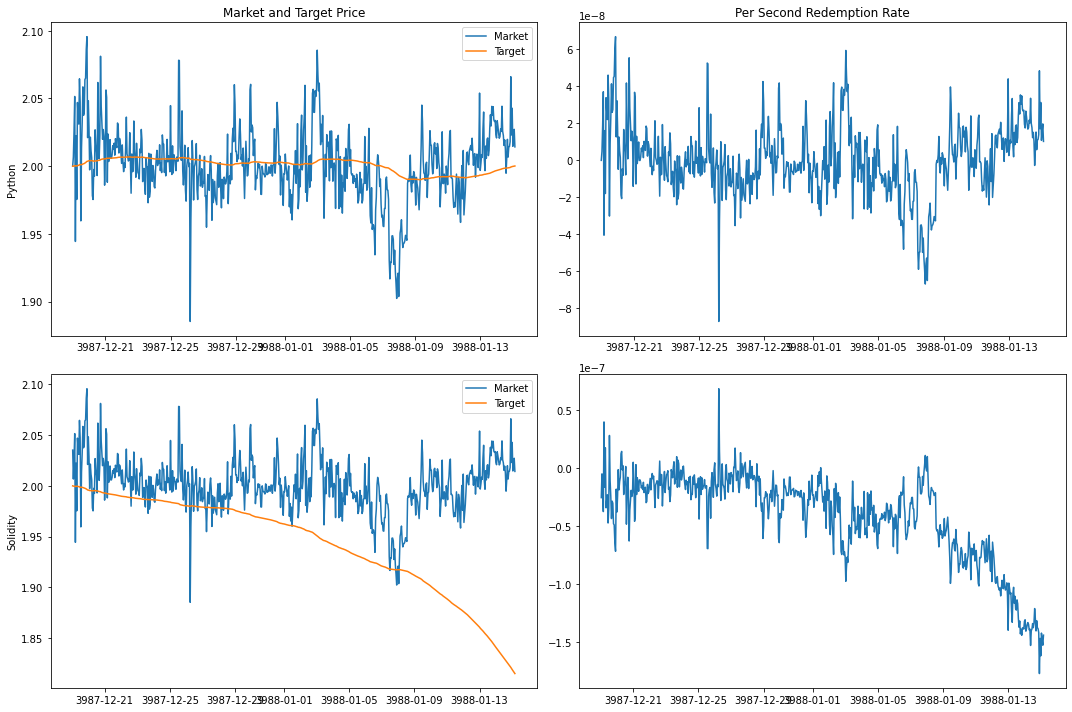

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15,10))

i = 0
axs.flat[i].plot(df['timestamp'], df['market_price'], label='Market')
axs.flat[i].plot(df['timestamp'], df['target_price'], label='Target')
axs.flat[i].set_ylabel('Python')
axs.flat[i].set_title('Market and Target Price')
axs.flat[i].legend()

i += 1 
axs.flat[i].plot(df['timestamp'], df['target_rate'])
axs.flat[i].set_title('Per Second Redemption Rate')

i += 1 
axs.flat[i].plot(data['timestamp'], data['MarketPrice(USD)'], label='Market')
axs.flat[i].plot(data['timestamp'], data['RedemptionPrice(USD)'], label='Target')
axs.flat[i].legend()
axs.flat[i].set_ylabel('Solidity')

i += 1 
axs.flat[i].plot(data['timestamp'], data['PerSecondRedemptionRate(float)'])


fig.tight_layout()
plt.show()

In [13]:
#python script stores result of the simulation in a predetermined location

In [14]:
#jupyter notebook shows visualizations of the results from solidity 
#implementation and cadCAD model and error metrics